# **CarLiOn Project**

In [ ]:
# import data
import pandas as pd
world_tourism = pd.read_csv('/content/world_tourism_economy_data.csv')
wgi_data = pd.read_excel('/content/wgidataset.xlsx')

In [ ]:
world_tourism.head()

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment
0,Aruba,ABW,1999,7.820000e+08,9.720000e+05,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN
1,Africa Eastern and Southern,AFE,1999,8.034209e+09,1.530938e+07,12.204030,NaN,7.760536,2.654293e+11,7.819865,NaN
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,1999,1.443613e+09,3.897975e+06,3.974476,NaN,6.147291,1.394683e+11,0.372266,NaN
4,Angola,AGO,1999,3.100000e+07,4.500000e+04,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN


In [ ]:
!pip install pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 19.8 MB/s eta 0:00:00


In [ ]:
# create groupings of countries by continant
import pycountry_convert as pc

def country_to_continent(country_code):
    try:
        # convert 3-letter to 2-letter code
        from pycountry import countries
        alpha2 = countries.get(alpha_3=country_code).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except Exception as e:
        return None

tourism = world_tourism.copy()
# A\apply to the DataFrame
tourism['continent'] = tourism['country_code'].apply(country_to_continent)
tourism = tourism.dropna(subset=['continent'])
tourism

,country,country_code,year,tourism_receipts,tourism_arrivals,tourism_exports,tourism_departures,tourism_expenditures,gdp,inflation,unemployment,continent
0,Aruba,ABW,1999,782000000.0,972000.0,62.542949,NaN,9.495387,1.722905e+09,2.280372,NaN,North America
2,Afghanistan,AFG,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
4,Angola,AGO,1999,31000000.0,45000.0,0.583858,NaN,2.489638,6.152923e+09,248.195902,NaN,Africa
5,Albania,ALB,1999,218000000.0,371000.0,55.969191,NaN,3.699007,3.212122e+09,0.389438,18.400,Europe
6,Andorra,AND,1999,NaN,9422000.0,NaN,NaN,NaN,1.240295e+09,NaN,NaN,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
6644,Samoa,WSM,2023,NaN,NaN,NaN,NaN,NaN,9.381894e+08,NaN,NaN,Oceania
6646,"Yemen, Rep.",YEM,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
6647,South Africa,ZAF,2023,NaN,NaN,NaN,NaN,NaN,3.806993e+11,6.073909,32.098,Africa
6648,Zambia,ZMB,2023,NaN,NaN,NaN,NaN,NaN,2.757796e+10,10.884532,NaN,Africa


In [ ]:
print(tourism['country'].unique())

['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'American Samoa' 'Antigua and Barbuda' 'Australia'
 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso'
 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina'
 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon'
 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros' 'Cabo Verde'
 'Costa Rica' 'Cuba' 'Curacao' 'Cayman Islands' 'Cyprus' 'Czechia'
 'Germany' 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'Ecuador' 'Egypt, Arab Rep.' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia'
 'Finland' 'Fiji' 'France' 'Faroe Islands' 'Micronesia, Fed. Sts.' 'Gabon'
 'United Kingdom' 'Georgia' 'Ghana' 'Gibraltar' 'Guinea' 'Gambia, The'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada' 'Greenland'
 'Guatemala' 'Guam' 'G

In [ ]:
! pip install miceforest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.4 MB/s eta 0:00:00


<Axes: >

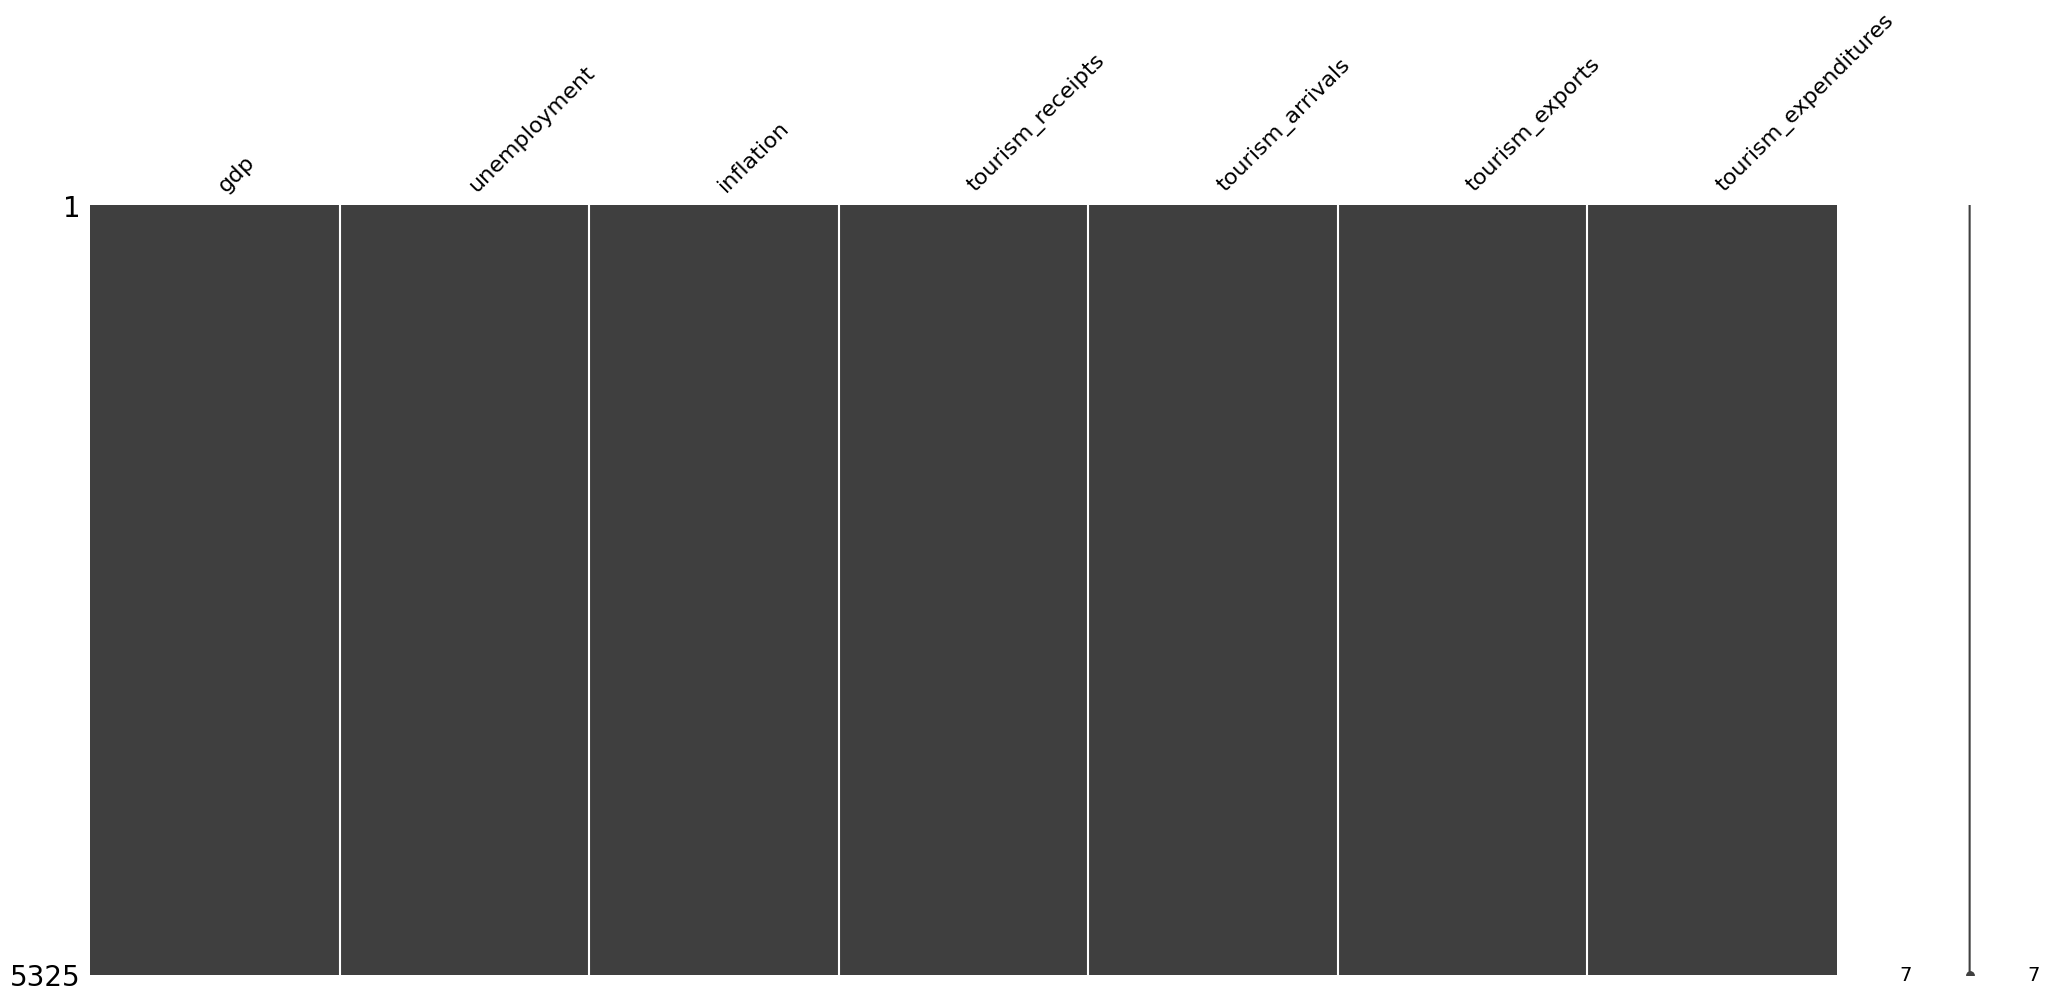

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import miceforest as mf
import missingno as msno
import numpy as np


# add continent info
import pycountry_convert as pc
from pycountry import countries

def country_to_continent(code):
    try:
        alpha2 = countries.get(alpha_3=code).alpha_2
        cont_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(cont_code)
    except:
        return None

tourism['continent'] = tourism['country_code'].apply(country_to_continent)
tourism = tourism.dropna(subset=['continent'])

# set categories
tourism['country_code'] = tourism['country_code'].astype('category')
tourism['continent'] = tourism['continent'].astype('category')

# select relevant columns
cols = ['country_code', 'continent', 'year', 'gdp', 'unemployment', 'inflation', 'tourism_receipts', 'tourism_arrivals', 'tourism_exports', 'tourism_expenditures']
tourism = tourism.reset_index(drop=True)

# impute
kernel = mf.ImputationKernel(
    tourism[cols],
    random_state=42
)
kernel.mice(3)

# Get imputed data
completed_df = kernel.complete_data(0)

# Visualize
msno.matrix(completed_df[['gdp', 'unemployment', 'inflation','tourism_receipts', 'tourism_arrivals', 'tourism_exports', 'tourism_expenditures']])

In [ ]:
completed_df.head(10)

,country_code,continent,year,gdp,unemployment,inflation,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures
0,ABW,North America,1999,1.722905e+09,11.158,2.280372,7.820000e+08,972000.0,62.542949,9.495387
1,AFG,Asia,1999,3.485166e+11,4.909,5.093968,1.555400e+10,24535000.0,4.875487,6.803224
2,AGO,Africa,1999,6.152923e+09,12.066,248.195902,3.100000e+07,45000.0,0.583858,2.489638
3,ALB,Europe,1999,3.212122e+09,18.400,0.389438,2.180000e+08,371000.0,55.969191,3.699007
4,AND,Europe,1999,1.240295e+09,4.320,3.614180,3.523000e+09,9422000.0,45.132298,4.325299
5,ARE,Asia,1999,8.444547e+10,10.590,3.418362,8.930000e+08,1165000.0,8.362291,5.528960
6,ARG,South America,1999,2.835230e+11,14.050,7.240349,3.175000e+09,2898000.0,11.340372,15.889092
7,ARM,Asia,1999,1.845482e+09,11.200,0.648246,4.700000e+07,41000.0,12.182393,5.645567
8,ASM,Oceania,1999,4.259647e+08,8.415,24.432024,2.871000e+09,41000.0,5.284960,7.814022
9,ATG,North America,1999,8.355148e+08,9.430,1.121288,1.530000e+08,560000.0,40.220194,11.200991


count    5.144000e+03
mean     3.226460e+11
std      1.480596e+12
min      1.396473e+07
25%      4.233500e+09
50%      1.830520e+10
75%      1.212133e+11
max      2.772071e+13
Name: gdp, dtype: float64


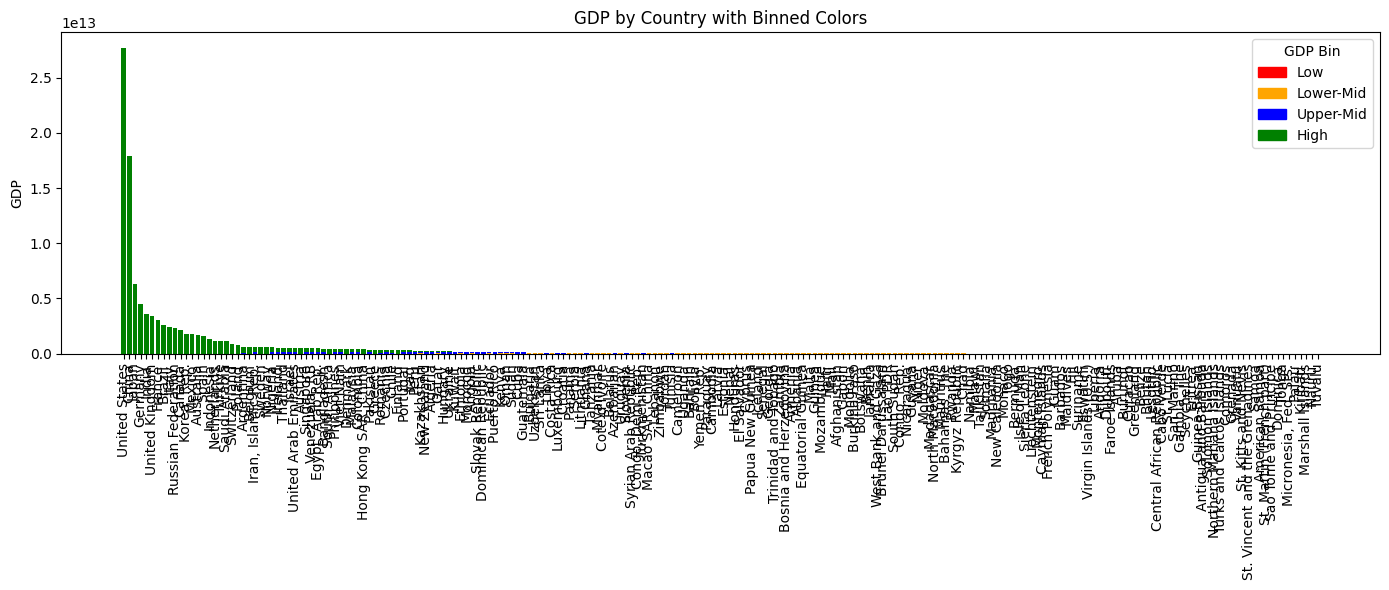

In [ ]:
## binning gdp
# sse 'tourism' DataFrame where 'gdp_bin' was created
tourism['gdp_bin'] = pd.qcut(tourism['gdp'], q=4, labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High'])
tourism = tourism.sort_values('gdp', ascending=False).dropna(subset='gdp')
print(tourism['gdp'].describe(percentiles=[.25, .5, .75]))

# define color map for bins
color_map = {
    'Low': 'red',
    'Lower-Mid': 'orange',
    'Upper-Mid': 'blue',
    'High': 'green',
}

# map each GDP bin to a color from the 'tourism' DataFrame
colors = tourism['gdp_bin'].map(color_map)

# plot
plt.figure(figsize=(14, 6))
plt.bar(tourism['country'], tourism['gdp'], color=colors) # Use tourism['country'] and tourism['gdp']
plt.xticks(rotation=90)
plt.ylabel('GDP')
plt.title('GDP by Country with Binned Colors')

# add legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
plt.legend(handles=legend_handles, title='GDP Bin')
plt.tight_layout()
plt.show()

In [ ]:
len(tourism['country'].unique())

210

# ANALYING MISSINGNESS


In [ ]:
# countries with no tourism_exports data over the years
no_exports_mask = (
    world_tourism.groupby('country')['tourism_exports']
      .apply(lambda col: col.notna().any() == False)
)

countries_without_exports = no_exports_mask[no_exports_mask].index.tolist()

print("Countries with no tourism_exports data:", countries_without_exports)

Countries with no tourism_exports data: ['American Samoa', 'Belize', 'British Virgin Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Cuba', 'Equatorial Guinea', 'Faroe Islands', 'Gibraltar', 'Greenland', 'Guam', 'Isle of Man', "Korea, Dem. People's Rep.", 'Kosovo', 'Liechtenstein', 'Micronesia, Fed. Sts.', 'Monaco', 'Northern Mariana Islands', 'Not classified', 'Puerto Rico', 'San Marino', 'Somalia', 'Spain', 'St. Martin (French part)', 'Turkmenistan', 'Turks and Caicos Islands', 'United Arab Emirates', 'United Kingdom', 'Virgin Islands (U.S.)', 'Zambia']


In [ ]:
# countries with no tourism_arrivals over the years
no_exports_mask = (
    world_tourism.groupby('country')['tourism_arrivals']
      .apply(lambda col: col.notna().any() == False)
)

countries_without_arrivals = no_exports_mask[no_exports_mask].index.tolist()

print("Countries with no tourism_arrivals data:", countries_without_arrivals)

Countries with no tourism_arrivals data: ['Afghanistan', 'Channel Islands', 'Equatorial Guinea', 'Faroe Islands', 'Gibraltar', 'Greenland', 'IDA blend', 'Isle of Man', "Korea, Dem. People's Rep.", 'Kosovo', 'Liberia', 'Nauru', 'Not classified', 'Somalia', 'South Sudan', 'St. Martin (French part)', 'Turkmenistan']


In [ ]:
### dropping missing columns for world tourism data

df = pd.read_csv('/content/world_tourism_economy_data.csv')
df = df.replace('..', pd.NA)
cols = [c for c in df.columns if c not in ['country','year','country_code','id']]

# compute, for each country & each column, whether there is ANY non-null value
country_has_data = (
    df
    .groupby('country')[cols]
    .agg(lambda x: x.notna().any())
)

# get the list of countries that are _entirely_ missing
dropped_by_col = {
    col: country_has_data.index[~country_has_data[col]].tolist()
    for col in cols
}

# overall set of countries to drop is the union across all columns
to_drop = set().union(*dropped_by_col.values())

# create filtered DataFrame
df_filtered = df[~df['country'].isin(to_drop)].copy()

print(f"Dropped {len(to_drop)} countries in total:")
print(sorted(to_drop))

# breakdown by column:
for col, countries in dropped_by_col.items():
    if countries:
        print(f"\nColumn “{col}” had {len(countries)} countries entirely missing:")
        print(sorted(countries))

print("\nOriginal shape:", df.shape)
print("Filtered shape:", df_filtered.shape)


Dropped 137 countries in total:
['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Aruba', 'Bahamas, The', 'Barbados', 'Belize', 'Benin', 'Bermuda', 'Bosnia and Herzegovina', 'Botswana', 'British Virgin Islands', 'Brunei Darussalam', 'Burkina Faso', 'Cabo Verde', 'Cameroon', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Comoros', "Cote d'Ivoire", 'Cuba', 'Curacao', 'Djibouti', 'Dominica', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Faroe Islands', 'Fragile and conflict affected situations', 'French Polynesia', 'Ghana', 'Gibraltar', 'Greenland', 'Grenada', 'Guam', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only

# RELATIONAL - ANALYSIS

In [ ]:
# creating id column to join datasets on
wgi_data['id'] = (wgi_data['code'].astype(str) + '_' +
                  wgi_data['year'].astype(str)
                  )
wgi_data.head()

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper,id
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,27.419355,AFG_1996
1,ALBcc1996,ALB,Albania,1996,cc,-0.893903,0.315914,3,19.354839,2.688172,43.010754,ALB_1996
2,DZAcc1996,DZA,Algeria,1996,cc,-0.566741,0.262077,4,33.333332,16.666666,52.688171,DZA_1996
3,ASMcc1996,ASM,American Samoa,1996,cc,..,..,..,..,..,..,ASM_1996
4,ADOcc1996,ADO,Andorra,1996,cc,1.318143,0.480889,1,87.096771,72.043015,96.774193,ADO_1996


In [ ]:
# creating id column to join datasets on
completed_df['id'] = (completed_df['country_code'].astype(str) + '_' +
                       completed_df['year'].astype(str)
                      )
completed_df.head()

,country_code,continent,year,gdp,unemployment,inflation,tourism_receipts,tourism_arrivals,tourism_exports,tourism_expenditures,id
0,ABW,North America,1999,1.722905e+09,11.158,2.280372,7.820000e+08,972000.0,62.542949,9.495387,ABW_1999
1,AFG,Asia,1999,3.485166e+11,4.909,5.093968,1.555400e+10,24535000.0,4.875487,6.803224,AFG_1999
2,AGO,Africa,1999,6.152923e+09,12.066,248.195902,3.100000e+07,45000.0,0.583858,2.489638,AGO_1999
3,ALB,Europe,1999,3.212122e+09,18.400,0.389438,2.180000e+08,371000.0,55.969191,3.699007,ALB_1999
4,AND,Europe,1999,1.240295e+09,4.320,3.614180,3.523000e+09,9422000.0,45.132298,4.325299,AND_1999


In [ ]:
# register the csv as a database
import duckdb
conn = duckdb.connect(database=':memory:')
conn.register('world_tourism', completed_df)
conn.register('wgi_data', wgi_data)

Economic Outcomes Regulatory Quality By Continent

In [ ]:
df_continent = conn.sql("""
WITH enriched AS (
  SELECT
    wg.countryname,
    wt.continent,
    wt.year,
    COALESCE(
      wt.tourism_exports,
      AVG(wt.tourism_exports) OVER (PARTITION BY wt.country_code)
    ) AS tourism_exports_imputed,
    wt.gdp,
    wt.inflation,
    wt.unemployment,
    -- convert non-numeric estimates to NULL, then cast
    CAST(
      NULLIF(wg.estimate, '..')
      AS DOUBLE
    ) AS regulatory_quality
  FROM world_tourism wt
  LEFT JOIN wgi_data wg
    ON wt.id = wg.id
    AND wg.indicator = 'rq'
)
SELECT
  continent,
  COUNT(*)                                  AS n_obs,
  AVG(regulatory_quality)                   AS avg_regulatory_quality,
  AVG(tourism_exports_imputed)              AS avg_tourism_exports,
  AVG(gdp)                                  AS avg_gdp,
  AVG(inflation)                            AS avg_inflation,
  AVG(unemployment)                         AS avg_unemployment
FROM enriched
GROUP BY continent
ORDER BY continent
""").df()

print("Indicators by continent:")
df_continent


Indicators by continent:


,continent,n_obs,avg_regulatory_quality,avg_tourism_exports,avg_gdp,avg_inflation,avg_unemployment
0,Africa,1350,-0.716836,14.714840,3.586581e+10,10.934291,8.710764
1,Asia,1225,-0.167913,12.977447,4.464667e+11,6.802781,6.286696
2,Europe,1150,0.903407,12.523449,4.117025e+11,4.705990,8.560743
3,North America,825,0.361878,31.033499,5.976819e+11,4.050935,8.357201
4,Oceania,475,-0.118668,32.540134,6.904057e+10,3.843053,9.387520
5,South America,300,-0.252677,6.952635,2.474776e+11,9.741481,7.958677


In [ ]:
df_plot = df_continent.set_index('continent')

# define metrics and labels
metrics = {
    'avg_gdp': 'Average GDP',
    'avg_inflation': 'Average Inflation Rate (%)',
    'avg_unemployment': 'Average Unemployment Rate (%)',
    'avg_tourism_exports': 'Average Tourism Exports'
}


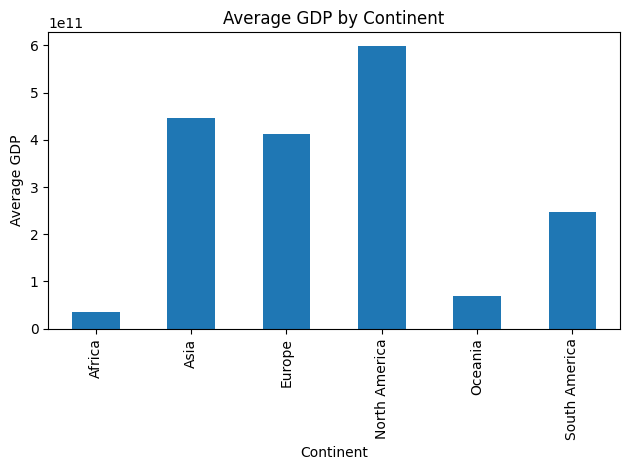

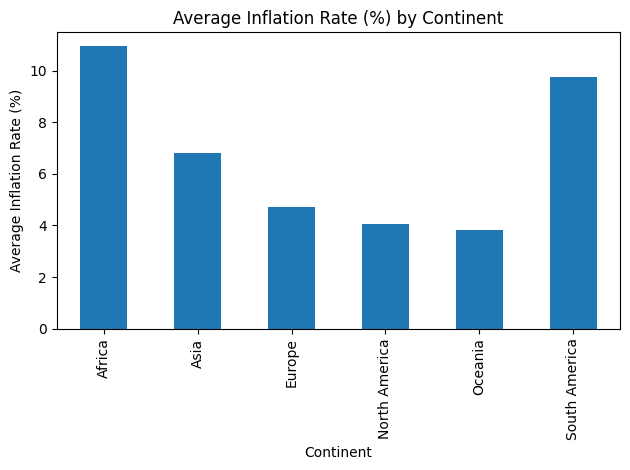

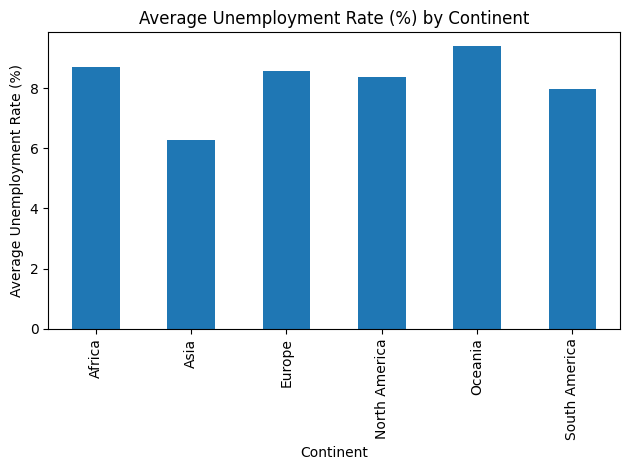

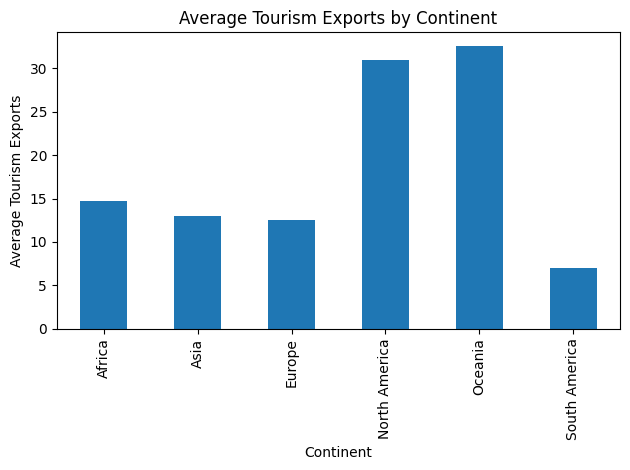

In [ ]:
# create separate bar plots for each metric
for col, label in metrics.items():
    plt.figure()
    df_plot[col].plot(kind='bar')
    plt.title(f'{label} by Continent')
    plt.xlabel('Continent')
    plt.ylabel(label)
    plt.tight_layout()

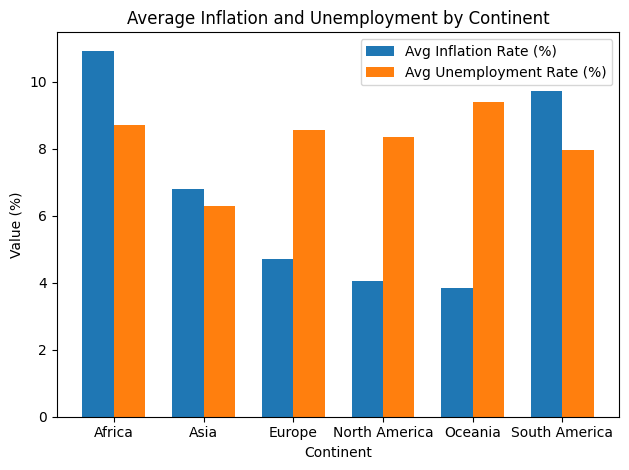

In [ ]:
## histogram with inflation and unemployment rates by continent\

continents = df_continent['continent']
inflation = df_continent['avg_inflation']
unemployment = df_continent['avg_unemployment']

# plot grouped bar chart
x = range(len(continents))
width = 0.35

plt.figure()
plt.bar([i - width/2 for i in x], inflation, width=width, label='Avg Inflation Rate (%)')
plt.bar([i + width/2 for i in x], unemployment, width=width, label='Avg Unemployment Rate (%)')
plt.xlabel('Continent')
plt.ylabel('Value (%)')
plt.title('Average Inflation and Unemployment by Continent')
plt.xticks(x, continents)
plt.legend()
plt.tight_layout()
plt.show()

Correlation Matrix: Tourism & All Six WGI Indicators

This gives you the pairwise Pearson correlations between tourism exports and each of the six governance indicators.

In [ ]:
# pull tourism and each governance metric i
df_corr_all = conn.sql("""
WITH base AS (
  SELECT
    wt.id,
    COALESCE(
      wt.tourism_exports,
      AVG(wt.tourism_exports) OVER (PARTITION BY wt.country_code)
    ) AS tourism_exports_imputed
  FROM world_tourism wt
)
SELECT
  b.tourism_exports_imputed,
  ge.estimate AS government_effectiveness,
  rq.estimate AS regulatory_quality,
  rl.estimate AS rule_of_law,
  va.estimate AS voice_and_accountability,
  pv.estimate AS political_stability,
  cc.estimate AS control_of_corruption
FROM base b
LEFT JOIN wgi_data ge ON b.id = ge.id AND ge.indicator = 'ge'
LEFT JOIN wgi_data rq ON b.id = rq.id AND rq.indicator = 'rq'
LEFT JOIN wgi_data rl ON b.id = rl.id AND rl.indicator = 'rl'
LEFT JOIN wgi_data va ON b.id = va.id AND va.indicator = 'va'
LEFT JOIN wgi_data pv ON b.id = pv.id AND pv.indicator = 'pv'
LEFT JOIN wgi_data cc ON b.id = cc.id AND cc.indicator = 'cc'
""").df()

# convert columns to numeric
for col in df_corr_all.columns:
    # exclude the 'tourism_exports_imputed' column if it's already numeric
    # or handle potential non-numeric values there too if needed
    if col != 'tourism_exports_imputed':
        df_corr_all[col] = pd.to_numeric(df_corr_all[col], errors='coerce')

print("Correlation matrix (tourism & WGI):")
df_corr_all.corr()


Correlation matrix (tourism & WGI):


,tourism_exports_imputed,government_effectiveness,regulatory_quality,rule_of_law,voice_and_accountability,political_stability,control_of_corruption
tourism_exports_imputed,1.000000,0.023485,0.019715,0.116825,0.187200,0.252614,0.092140
government_effectiveness,0.023485,1.000000,0.930019,0.931886,0.747144,0.710115,0.920202
regulatory_quality,0.019715,0.930019,1.000000,0.903802,0.775051,0.658483,0.866683
rule_of_law,0.116825,0.931886,0.903802,1.000000,0.818970,0.787396,0.937946
voice_and_accountability,0.187200,0.747144,0.775051,0.818970,1.000000,0.678811,0.772725
political_stability,0.252614,0.710115,0.658483,0.787396,0.678811,1.000000,0.752179
control_of_corruption,0.092140,0.920202,0.866683,0.937946,0.772725,0.752179,1.000000


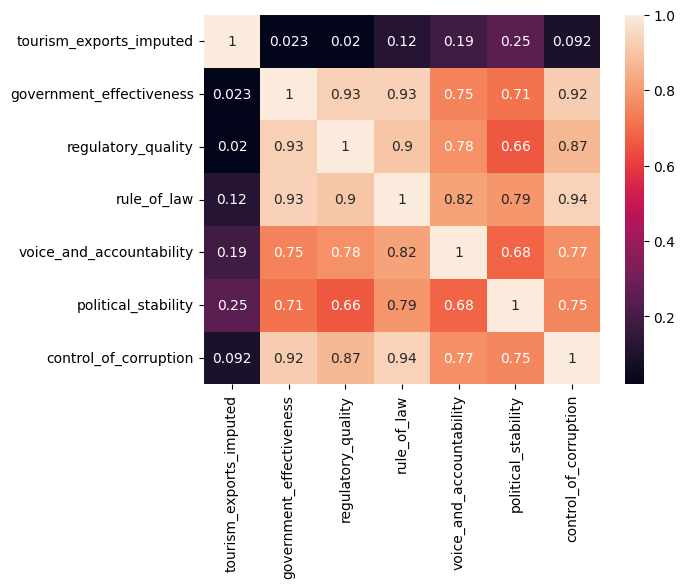

In [ ]:
# correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_corr_all.corr(), annot=True)
plt.show()
